In [20]:
from __future__ import print_function, division
import pandas as pd
import pylab as pl
import os
import csv
import seaborn as sns
import statsmodels.formula.api as smf
import scipy.stats
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [21]:
datapred = pd.read_csv('../Final_Data/predicted_2013.csv')
datapred

,Unnamed: 0,Datetime,Dew_Point_F,Humidity,Temperature_F,Wind_Speed_MPH,Consumption,Income,Overall,Diff,Diff_perc,Month,DayofWeek,Hour,WeekofYear,Year,predicted,predict2
0,26284,2013-01-01 00:00:00,44.6,87,48.2,9.2,0.214885,Low,0.250803,-0.035918,-0.143212,1,1,0,1,2013,0.383608,0.386390
1,26285,2013-01-01 00:00:00,44.6,87,48.2,9.2,0.244850,Medium,0.250803,-0.005952,-0.023732,1,1,0,1,2013,0.420259,0.423042
2,26286,2013-01-01 00:00:00,44.6,87,48.2,9.2,0.284734,High,0.250803,0.033931,0.135291,1,1,0,1,2013,0.494476,0.497258
3,26287,2013-01-01 01:00:00,44.6,87,48.2,10.4,0.387206,Low,0.442699,-0.055492,-0.125350,1,1,1,1,2013,0.410840,0.416374
4,26288,2013-01-01 01:00:00,44.6,87,48.2,10.4,0.426540,Medium,0.442699,-0.016159,-0.036500,1,1,1,1,2013,0.447492,0.453026
5,26289,2013-01-01 01:00:00,44.6,87,48.2,10.4,0.499935,High,0.442699,0.057237,0.129291,1,1,1,1,2013,0.521708,0.527242
6,26290,2013-01-01 02:00:00,44.6,93,46.4,12.7,0.318111,Low,0.371424,-0.053313,-0.143537,1,1,2,1,2013,0.345151,0.344136
7,26291,2013-01-01 02:00:00,44.6,93,46.4,12.7,0.351710,Medium,0.371424,-0.019714,-0.053076,1,1,2,1,2013,0.381803,0.380787
8,26292,2013-01-01 02:00:00,44.6,93,46.4,12.7,0.429294,High,0.371424,0.057870,0.155807,1,1,2,1,2013,0.456019,0.455004
9,26293,2013-01-01 03:00:00,41.0,77,46.0,9.2,0.263513,Low,0.311469,-0.047956,-0.153968,1,1,3,1,2013,0.290934,0.301072


In [22]:
data_low = datapred[datapred.Income == "Low"]

In [23]:
datapred.describe()

,Unnamed: 0,Dew_Point_F,Humidity,Temperature_F,Wind_Speed_MPH,Consumption,Overall,Diff,Diff_perc,Month,DayofWeek,Hour,WeekofYear,Year,predicted,predict2
count,25902.000000,25902.000000,25902.000000,25902.000000,25902.000000,25902.000000,25902.000000,25902.000000,25902.000000,25902.000000,25902.000000,25902.000000,25902.000000,25902.0,25902.000000,25902.000000
mean,39383.091035,43.728793,75.748784,51.782326,9.280056,0.417724,0.421649,-0.003925,-0.009313,6.517952,2.997684,11.575863,26.392055,2013.0,0.425554,0.425248
std,7556.693587,10.282786,16.731157,12.055596,4.684774,0.159940,0.150189,0.058998,0.124533,3.440242,2.001195,6.897481,15.013572,0.0,0.145695,0.143715
min,26284.000000,14.000000,8.000000,24.800000,1.200000,0.159034,0.186124,-0.218505,-0.283122,1.000000,0.000000,0.000000,1.000000,2013.0,0.068413,0.085445
25%,32843.250000,35.600000,66.000000,42.800000,5.800000,0.301345,0.314837,-0.037476,-0.120862,4.000000,1.000000,6.000000,13.000000,2013.0,0.317997,0.320536
50%,39369.500000,44.600000,81.000000,51.800000,8.100000,0.392053,0.402702,-0.002371,-0.005799,7.000000,3.000000,12.000000,26.000000,2013.0,0.417948,0.417710
75%,45922.750000,51.800000,88.000000,60.800000,11.500000,0.506892,0.505941,0.032479,0.098536,10.000000,5.000000,18.000000,39.000000,2013.0,0.524691,0.522854
max,52512.000000,68.000000,100.000000,91.400000,39.100000,1.114286,0.942716,0.196859,0.259851,12.000000,6.000000,23.000000,52.000000,2013.0,0.894085,0.884315


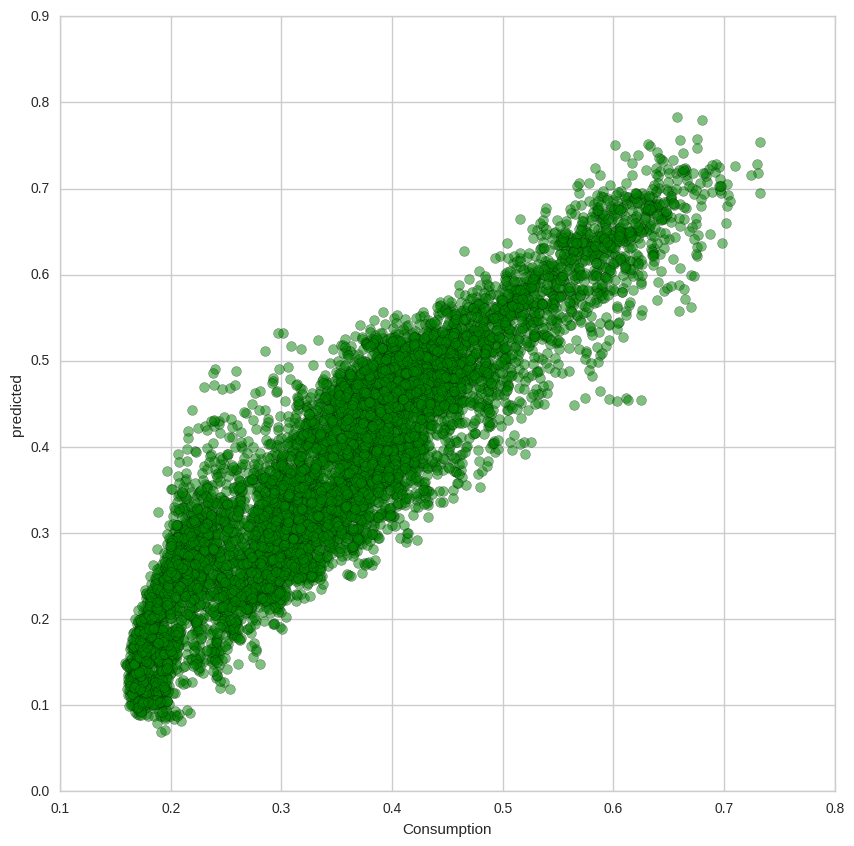

In [40]:
sns.set_style("whitegrid")
ax = pl.figure(figsize=(10,10)).add_subplot(111)
data_low.plot(kind='scatter', x='Consumption', y='predicted', color='gold',s=50, alpha=.5, ax=ax)
#data_low.plot(kind='scatter', x='Consumption', y='predict2', color='pink',s=50, alpha=.5, ax=ax)


(7800, 8200)

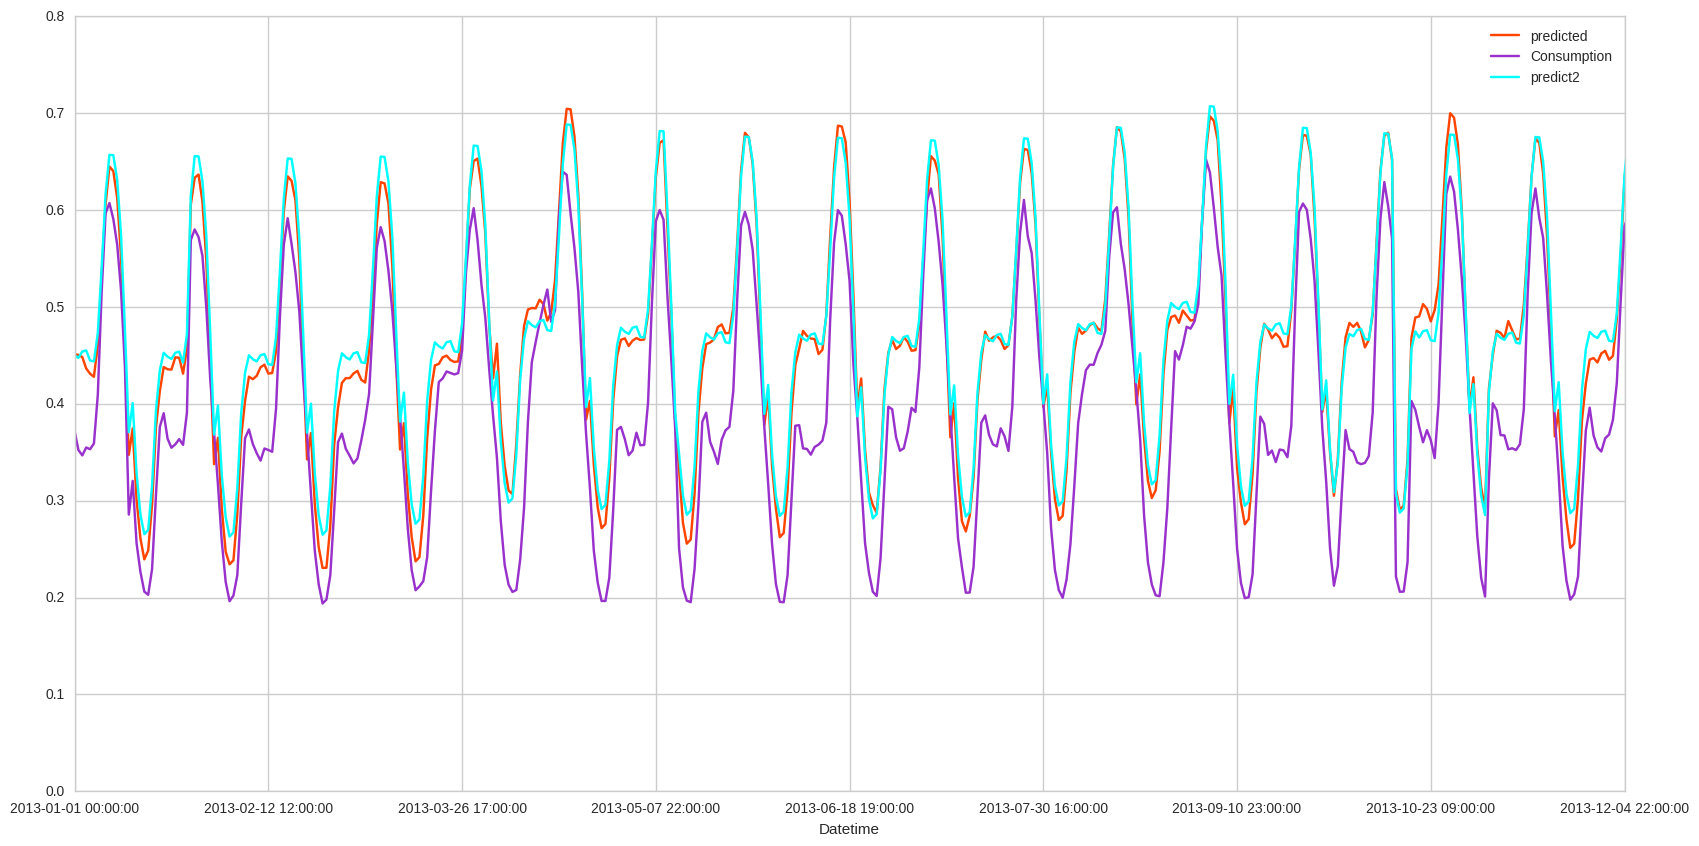

In [42]:
sns.set_style("whitegrid")
ax = pl.figure(figsize=(20,10)).add_subplot(111)
data_low.plot(x='Datetime', y='predicted', color='orangered', ax=ax)
data_low.plot(x='Datetime', y='Consumption', color='darkorchid', ax=ax)
data_low.plot(x='Datetime', y='predict2', color='cyan', ax=ax)
ax.set_xlim(7800,8200)

In [31]:
data_hi = datapred[datapred.Income == "High"]

In [32]:
datapred.describe()

,Unnamed: 0,Dew_Point_F,Humidity,Temperature_F,Wind_Speed_MPH,Consumption,Overall,Diff,Diff_perc,Month,DayofWeek,Hour,WeekofYear,Year,predicted,predict2
count,25902.000000,25902.000000,25902.000000,25902.000000,25902.000000,25902.000000,25902.000000,25902.000000,25902.000000,25902.000000,25902.000000,25902.000000,25902.000000,25902.0,25902.000000,25902.000000
mean,39383.091035,43.728793,75.748784,51.782326,9.280056,0.417724,0.421649,-0.003925,-0.009313,6.517952,2.997684,11.575863,26.392055,2013.0,0.425554,0.425248
std,7556.693587,10.282786,16.731157,12.055596,4.684774,0.159940,0.150189,0.058998,0.124533,3.440242,2.001195,6.897481,15.013572,0.0,0.145695,0.143715
min,26284.000000,14.000000,8.000000,24.800000,1.200000,0.159034,0.186124,-0.218505,-0.283122,1.000000,0.000000,0.000000,1.000000,2013.0,0.068413,0.085445
25%,32843.250000,35.600000,66.000000,42.800000,5.800000,0.301345,0.314837,-0.037476,-0.120862,4.000000,1.000000,6.000000,13.000000,2013.0,0.317997,0.320536
50%,39369.500000,44.600000,81.000000,51.800000,8.100000,0.392053,0.402702,-0.002371,-0.005799,7.000000,3.000000,12.000000,26.000000,2013.0,0.417948,0.417710
75%,45922.750000,51.800000,88.000000,60.800000,11.500000,0.506892,0.505941,0.032479,0.098536,10.000000,5.000000,18.000000,39.000000,2013.0,0.524691,0.522854
max,52512.000000,68.000000,100.000000,91.400000,39.100000,1.114286,0.942716,0.196859,0.259851,12.000000,6.000000,23.000000,52.000000,2013.0,0.894085,0.884315


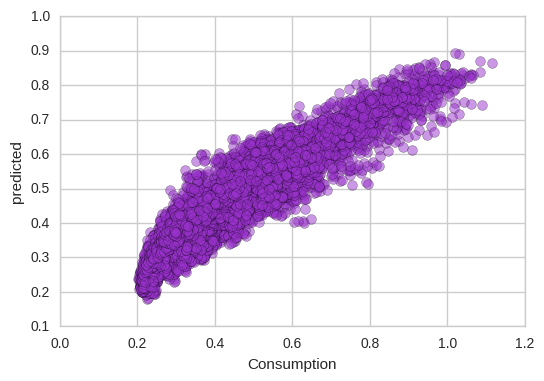

In [33]:
sns.set_style("whitegrid")

data_hi.plot(kind='scatter', x='Consumption', y='predicted', color='darkorchid',s=50, alpha=.5)
#ax1.plot(data2.Temperature_F, p1.predict(), color='k')
#ax1.set_title('{0} hour lag (1d), R2 = {1}'.format( 0, round(p1.rsquared, 4)), fontsize=14)
#ax1.set_ylabel("KWH", fontsize=14)

(5000, 5100)

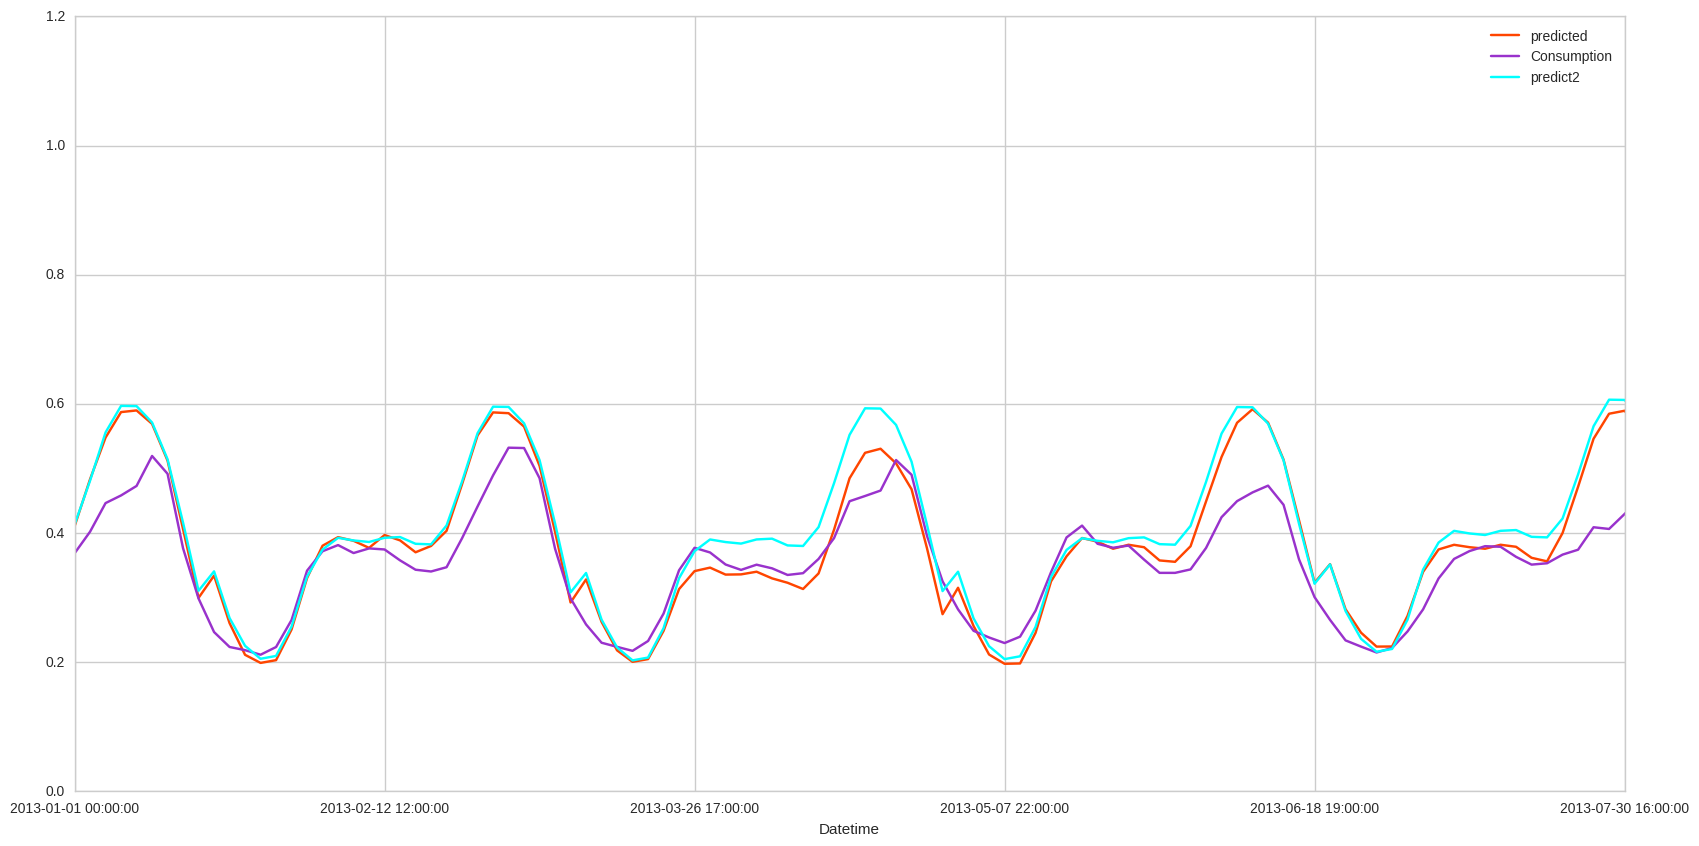

In [43]:
sns.set_style("whitegrid")
ax = pl.figure(figsize=(20,10)).add_subplot(111)
data_hi.plot(x='Datetime', y='predicted', color='orangered', ax=ax)
data_hi.plot(x='Datetime', y='Consumption', color='darkorchid', ax=ax)
data_hi.plot(x='Datetime', y='predict2', color='cyan', ax=ax)
ax.set_xlim(5000,5100)